In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
tqdm.pandas()

In [27]:
data_df = pd.read_csv("./data/raw.csv")

In [28]:
data_df

,Unnamed: 0,comment,Sentiment
0,0,"áo vải cũng được, nhưng hình in nó chóc nhiều ...",NEG
1,1,Vải thô cứng xấu không dám mua lần 2 luôn á tr...,NEG
2,2,Đánh giá này mang tính chất để nhận xu fghjhh...,NEG
3,3,Size L to quá mng mua nên coi size kĩ \nÁo mỏn...,NEG
4,4,Áo khá mỏng mũ 2 lớp nhưng cũng mỏng huhu:(( k...,NEG
...,...,...,...
29876,24939,"Công dụng: lÀm mềm tóc\nThơm , mượt tóc lắm, d...",POS
29877,25242,Mua bộ 3 kem đánh răng được tặng túi xinh lắm\...,POS
29878,25243,"Thời gian giao hàng nhanh, đóng gói sản phẩm r...",POS
29879,25270,Chưa xịt nên chưa biết công dụng hy vọng có cô...,POS


In [29]:
def convert(x):
    if x == "NEG" or x == "NEU":
        return "0"
    else:
        return "1"
data_df["label"] = data_df["Sentiment"].apply(lambda x: convert(x))

In [30]:
y = data_df['label'].values.tolist()

([<matplotlib.patches.Wedge at 0x20f6438e788>,
 [Text(-0.3487497294332044, 1.043251468352797, 'Tích cực'),
  Text(0.3487498271094549, -1.043251435700486, 'Tiêu cực')])

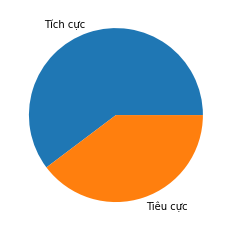

In [32]:
plt.pie(y, labels = ["Tích cực", "Tiêu cực"])

In [35]:
dictionary = {}
with open("data/teencode.txt" , encoding = "utf8") as f:
    for line in f:
        (key, val) = line.split("	",1)
        dictionary[key.strip()] = val.strip()

In [36]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [37]:
def covert_teencode(data):
    pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in dictionary.keys()) + r')(?!\w)')

    # pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in dictionary.keys()) + r')\b')
    result = pattern.sub(lambda x: dictionary[x.group()], data)
    return result

In [38]:
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
 
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
dicchar = loaddicchar()
 
def covert_unicode(data):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], data)

In [39]:
def remove_duplicate(data):
    data = data.split(" ")
    data = ["".join(dict.fromkeys(x)) for x in data]
    return " ".join(data)
    

In [40]:
def remove_wrong_word(word):
    if len(word)  == 1 or len(word) > 7 :
        return ""
    return word

In [41]:
def remove_stop_word(data):
    text_file = open("./data/vietnamese-stopwords.txt", "r",encoding = "utf8")
    lines = text_file.readlines()
    stop_words = [word.strip() for word in lines]
    data1 = []
    data = data.split(" ")
    for word in data:
        if word not in stop_words:
            data1.append(word)
    return " ".join(data1)

In [42]:
def no_accent_vietnamese(s):
    s = re.sub(r'[àáạảãâầấậẩẫăằắặẳẵ]', 'a', s)
    s = re.sub(r'[ÀÁẠẢÃĂẰẮẶẲẴÂẦẤẬẨẪ]', 'A', s)
    s = re.sub(r'[èéẹẻẽêềếệểễ]', 'e', s)
    s = re.sub(r'[ÈÉẸẺẼÊỀẾỆỂỄ]', 'E', s)
    s = re.sub(r'[òóọỏõôồốộổỗơờớợởỡ]', 'o', s)
    s = re.sub(r'[ÒÓỌỎÕÔỒỐỘỔỖƠỜỚỢỞỠ]', 'O', s)
    s = re.sub(r'[ìíịỉĩ]', 'i', s)
    s = re.sub(r'[ÌÍỊỈĨ]', 'I', s)
    s = re.sub(r'[ùúụủũưừứựửữ]', 'u', s)
    s = re.sub(r'[ƯỪỨỰỬỮÙÚỤỦŨ]', 'U', s)
    s = re.sub(r'[ỳýỵỷỹ]', 'y', s)
    s = re.sub(r'[ỲÝỴỶỸ]', 'Y', s)
    s = re.sub(r'[Đ]', 'D', s)
    s = re.sub(r'[đ]', 'd', s)
    return s

In [43]:
def preprocessing(data):
    punc_re = '[^\w\s'+uniChars+']'
    data = re.sub(punc_re,' ', data)
    data = data.lower()
#     data = remove_duplicate(data)
    data = l=re.sub(r"\n"," ",data)
    data = covert_unicode(data)
    data = covert_teencode(data)
    data = remove_emojis(data)
    data = remove_stop_word(data)
    return data

def preprocessing_stop_word(data):
    punc_re = '[^\w\s'+uniChars+']'
    data = re.sub(punc_re,' ', data)
    data = data.lower()
#     data = remove_duplicate(data)
    data = l=re.sub(r"\n"," ",data)
    data = covert_unicode(data)
    data = covert_teencode(data)
    data = remove_emojis(data)
#     data = remove_stop_word(data)
    return data

In [44]:
data_df = data_df.dropna()
data_copy = data_df.copy()
data_copy_rm_sw = data_df.copy()

In [47]:

data_copy["preprocessing"] = data_copy.progress_apply(lambda x: preprocessing_stop_word(x['comment']), axis = 1)

100%|██████████████████████████████████████████████████████████████████████████| 29880/29880 [00:09<00:00, 2992.31it/s]


In [48]:
data_copy_rm_sw["preprocessing"] = data_copy_rm_sw.progress_apply(lambda x: preprocessing(x['comment']), axis = 1)

100%|███████████████████████████████████████████████████████████████████████████| 29880/29880 [00:47<00:00, 632.78it/s]


In [49]:
from pyvi.ViTokenizer import tokenize

def token_text(x):
    return tokenize(x).split(" ")
data_copy_rm_sw["token"] = data_copy_rm_sw.progress_apply(lambda x: token_text(x['preprocessing']), axis = 1)

data_copy["token"] = data_copy.progress_apply(lambda x: token_text(x['preprocessing']), axis = 1)

100%|██████████████████████████████████████████████████████████████████████████| 29880/29880 [00:12<00:00, 2437.89it/s]


In [50]:
def remove_large_word(x):
    arr = []
    for i in x:
        if len(i) < 20:
            arr.append(i)
    return arr
data_copy["token"] = data_copy.progress_apply(lambda x: remove_large_word(x['token']), axis = 1)
data_copy_rm_sw["token"] = data_copy_rm_sw.progress_apply(lambda x: remove_large_word(x['token']), axis = 1)

100%|█████████████████████████████████████████████████████████████████████████| 29880/29880 [00:00<00:00, 84406.99it/s]


In [51]:
data_copy = data_copy[data_copy["token"].str.len()>0]
data_copy_rm_sw = data_copy_rm_sw[data_copy_rm_sw["token"].str.len()>0]


In [52]:
data_copy['token'] = data_copy['token'].apply(lambda x: ' '.join(x))
data_copy_rm_sw['token'] = data_copy_rm_sw['token'].apply(lambda x: ' '.join(x))

C:\Users\Long\anaconda3\envs\do_an\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
data_copy_rm_sw

,Unnamed: 0,comment,Sentiment,label,preprocessing,token
0,0,"áo vải cũng được, nhưng hình in nó chóc nhiều ...",NEG,0,áo vải hình in chóc size lỗi mặc rộng,áo vải hình in chóc size lỗi mặc rộng
1,1,Vải thô cứng xấu không dám mua lần 2 luôn á tr...,NEG,0,vải thô cứng xấu dám mua 2 trời,vải thô cứng xấu dám mua 2 trời
2,2,Đánh giá này mang tính chất để nhận xu fghjhh...,NEG,0,đánh giá chất xu fghjhhhhhhhhhjjhhhbfccxxsssd...,đánh_giá chất xu
3,3,Size L to quá mng mua nên coi size kĩ \nÁo mỏn...,NEG,0,size l to mua coi size kĩ áo mỏng thất vọng ...,size l to mua coi size kĩ áo mỏng thất_vọng bn...
4,4,Áo khá mỏng mũ 2 lớp nhưng cũng mỏng huhu:(( k...,NEG,0,áo mỏng mũ 2 lớp mỏng huhu ưng lắm hình in...,áo mỏng mũ 2 lớp mỏng huhu ưng lắm hình in đẹp...
...,...,...,...,...,...,...
29876,24939,"Công dụng: lÀm mềm tóc\nThơm , mượt tóc lắm, d...",POS,1,công dụng mềm tóc thơm mượt tóc lắm dầu xả...,công_dụng mềm tóc thơm mượt tóc lắm dầu xả mượ...
29877,25242,Mua bộ 3 kem đánh răng được tặng túi xinh lắm\...,POS,1,mua 3 kem đánh tặng túi xinh lắm túi tặng kèm ...,mua 3 kem đánh tặng túi xinh lắm túi tặng kèm ...
29878,25243,"Thời gian giao hàng nhanh, đóng gói sản phẩm r...",POS,1,thời gian giao hàng đóng gói sản phẩm chắn,thời_gian giao hàng đóng_gói sản_phẩm chắn
29879,25270,Chưa xịt nên chưa biết công dụng hy vọng có cô...,POS,1,xịt công dụng hy vọng công dụng mùa hè,xịt công_dụng hy_vọng công_dụng mùa hè


In [51]:
data_copy_rm_sw.to_csv("./data/data_no_sw.csv")
data_copy.to_csv("./data/data_have_sw.csv")

In [ ]:
|